In [1]:
import cv2

import glob
import os
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_path = 'G:/Projects/Gods Classification/Model to train/dataset/Train/*'
cls_paths = glob.glob(train_path)
img_classes = [x.split('\\')[1] for x in cls_paths]

In [3]:
cls_paths

['G:/Projects/Gods Classification/Model to train/dataset/Train\\Brahma',
 'G:/Projects/Gods Classification/Model to train/dataset/Train\\Ganesha',
 'G:/Projects/Gods Classification/Model to train/dataset/Train\\Hanuman',
 'G:/Projects/Gods Classification/Model to train/dataset/Train\\Shiva',
 'G:/Projects/Gods Classification/Model to train/dataset/Train\\Vishnu']

In [6]:
images = {}

for i,img_class in enumerate(img_classes):
    images[img_class] = list()
    for img_path in glob.glob(cls_paths[i]+'/*'):
        images[img_class].append(cv2.imread(img_path))

In [7]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

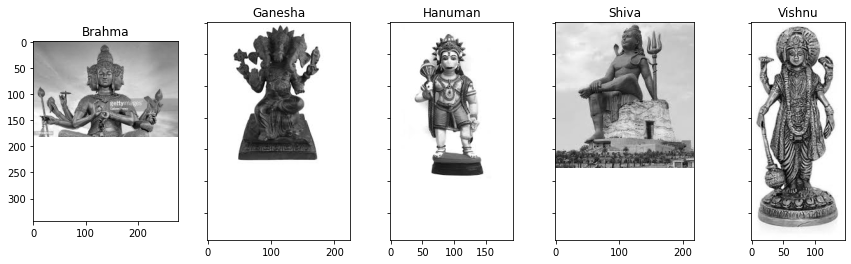

In [8]:
list_of_random_images = [cv2.cvtColor(images[img][np.random.randint(1,400)],cv2.COLOR_RGB2GRAY) for img in images]
plot_image(list_of_random_images,img_classes,'gray')

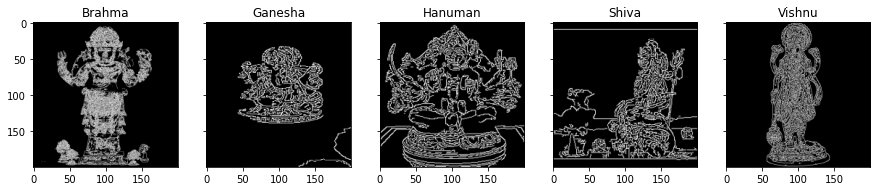

In [7]:
list_of_canny_images = [cv2.resize(cv2.Canny(img,80,200),(200,200),interpolation=cv2.INTER_AREA) for img in list_of_random_images]
plot_image(list_of_canny_images,img_classes,'gray')

In [8]:
list_of_canny_images[0].shape

(200, 200)

In [ ]:
img_new = cv2.Canny(img,80,200)

In [ ]:
plt.imshow(img_new)

In [9]:
img = list_of_random_images[0]

In [66]:
if img.shape[0] > 100 and img.shape[1] > 100:
    h, w = img.shape
    resized_image = cv2.resize(img, (200,200),
                               interpolation=cv2.INTER_AREA)

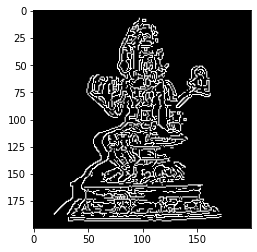

In [67]:
plt.imshow(cv2.Canny(resized_image,80,200),cmap='gray')

In [10]:
img

array([[121, 120, 120, ..., 122, 122, 122],
       [122, 121, 121, ..., 122, 123, 122],
       [123, 122, 122, ..., 123, 123, 123],
       ...,
       [245, 246, 246, ..., 151, 149, 146],
       [247, 247, 247, ..., 150, 145, 141],
       [247, 247, 249, ..., 151, 144, 139]], dtype=uint8)

In [14]:
crop_factor = min(img.shape)/max(img.shape)

In [15]:
crop_factor

0.6594202898550725

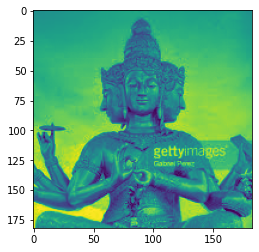

In [22]:
plt.imshow(crop)

In [24]:
def crop_image(image):
    crop_factor = min(img.shape)/max(img.shape)
    if img.shape[0]>img.shape[1]:
        crop = img[int(img.shape[0]*(1-crop_factor)/2):int(img.shape[0]*(1+crop_factor)/2),:]
    else:
        crop = img[:,int(img.shape[1]*(1-crop_factor)/2):int(img.shape[1]*(1+crop_factor)/2)]
    return crop

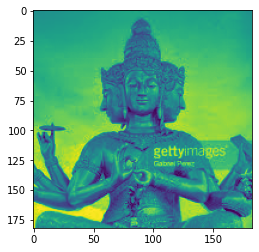

In [28]:
plt.imshow(crop_image(img))

In [31]:
(~crop_image(img)==crop_image(crop)).sum()

0

In [32]:
!pip install bing-image-downloader

You should consider upgrading via the 'c:\users\gowdh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [33]:
from bing_image_downloader import downloader


In [39]:
downloader.download('Hanuman Idol',limit=2000)


[%] Downloading Images to G:\Projects\Gods Classification\Model to train\Notebooks\dataset\Hanuman Idol


[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from https://1.bp.blogspot.com/-8r5d1pDprZA/XsGJut8JG6I/AAAAAAAAAVk/ZDHVHI6k5lg2QC-CGJiCZqw-xIRF5bRewCLcBGAsYHQ/s1600/bhagwan-hanuman-panchmukhi-jaishrihanumanchalisa.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://qph.fs.quoracdn.net/main-qimg-899cf2fc5f9a3a41b361ba82e6c5b3e4-c
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/_9vPNlqoYUtY/SIXe4gghy5I/AAAAAAAAApk/k0w5HHF78po/s400/Shiva+Idol+at+Brihadeeswara+Temple.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/3b/73/bf/3b73bfc1114f6198381cad49fa106bf8.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://indianastrology.co.in/wp-content/uploads/2014/11/Hanuman-Mantra.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.lotussculpture.com/mm5/gra

[%] Indexed 9 Images on Page 43.




[!!]Indexing page: 44

[%] Indexed 9 Images on Page 44.




[!!]Indexing page: 45

[%] Indexed 9 Images on Page 45.




[!!]Indexing page: 46

[%] Indexed 9 Images on Page 46.




[!!]Indexing page: 47

[%] Indexed 9 Images on Page 47.




[!!]Indexing page: 48

[%] Indexed 9 Images on Page 48.




[!!]Indexing page: 49

[%] Indexed 9 Images on Page 49.




[!!]Indexing page: 50

[%] Indexed 9 Images on Page 50.




[!!]Indexing page: 51

[%] Indexed 9 Images on Page 51.




[!!]Indexing page: 52

[%] Indexed 9 Images on Page 52.




[!!]Indexing page: 53

[%] Indexed 9 Images on Page 53.




[!!]Indexing page: 54

[%] Indexed 9 Images on Page 54.




[!!]Indexing page: 55

[%] Indexed 9 Images on Page 55.




[!!]Indexing page: 56

[%] Indexed 9 Images on Page 56.




[!!]Indexing page: 57

[%] Indexed 9 Images on Page 57.




[!!]Indexing page: 58

[%] Indexed 9 Images on Page 58.




[!!]Indexing page: 59

[%] Indexed 9 Images on Page 59.




[!!

[%] Indexed 9 Images on Page 119.




[!!]Indexing page: 120

[%] Indexed 9 Images on Page 120.




[!!]Indexing page: 121

[%] Indexed 9 Images on Page 121.




[!!]Indexing page: 122

[%] Indexed 9 Images on Page 122.




[!!]Indexing page: 123

[%] Indexed 9 Images on Page 123.




[!!]Indexing page: 124

[%] Indexed 9 Images on Page 124.




[!!]Indexing page: 125

[%] Indexed 9 Images on Page 125.




[!!]Indexing page: 126

[%] Indexed 9 Images on Page 126.




[!!]Indexing page: 127

[%] Indexed 9 Images on Page 127.




[!!]Indexing page: 128

[%] Indexed 9 Images on Page 128.




[!!]Indexing page: 129

[%] Indexed 9 Images on Page 129.




[!!]Indexing page: 130

[%] Indexed 9 Images on Page 130.




[!!]Indexing page: 131

[%] Indexed 9 Images on Page 131.




[!!]Indexing page: 132

[%] Indexed 9 Images on Page 132.




[!!]Indexing page: 133

[%] Indexed 9 Images on Page 133.




[!!]Indexing page: 134

[%] Indexed 9 Images on Page 134.




[!!]Indexing page: 135

[%] Inde

[%] Indexed 9 Images on Page 194.




[!!]Indexing page: 195

[%] Indexed 9 Images on Page 195.




[!!]Indexing page: 196

[%] Indexed 9 Images on Page 196.




[!!]Indexing page: 197

[%] Indexed 9 Images on Page 197.




[!!]Indexing page: 198

[%] Indexed 9 Images on Page 198.




[!!]Indexing page: 199

[%] Indexed 9 Images on Page 199.




[!!]Indexing page: 200

[%] Indexed 9 Images on Page 200.




[!!]Indexing page: 201

[%] Indexed 9 Images on Page 201.




[!!]Indexing page: 202

[%] Indexed 9 Images on Page 202.




[!!]Indexing page: 203

[%] Indexed 9 Images on Page 203.




[!!]Indexing page: 204

[%] Indexed 9 Images on Page 204.




[!!]Indexing page: 205

[%] Indexed 9 Images on Page 205.




[!!]Indexing page: 206

[%] Indexed 9 Images on Page 206.




[!!]Indexing page: 207

[%] Indexed 9 Images on Page 207.




[!!]Indexing page: 208

[%] Indexed 9 Images on Page 208.




[!!]Indexing page: 209

[%] Indexed 9 Images on Page 209.




[!!]Indexing page: 210

[%] Inde

[%] Indexed 9 Images on Page 269.




[!!]Indexing page: 270

[%] Indexed 9 Images on Page 270.




[!!]Indexing page: 271

[%] Indexed 9 Images on Page 271.




[!!]Indexing page: 272

[%] Indexed 9 Images on Page 272.




[!!]Indexing page: 273

[%] Indexed 9 Images on Page 273.




[!!]Indexing page: 274

[%] Indexed 9 Images on Page 274.




[!!]Indexing page: 275

[%] Indexed 9 Images on Page 275.




[!!]Indexing page: 276

[%] Indexed 9 Images on Page 276.




[!!]Indexing page: 277

[%] Indexed 9 Images on Page 277.




[!!]Indexing page: 278

[%] Indexed 9 Images on Page 278.




[!!]Indexing page: 279

[%] Indexed 9 Images on Page 279.




[!!]Indexing page: 280

[%] Indexed 9 Images on Page 280.




[!!]Indexing page: 281

[%] Indexed 9 Images on Page 281.




[!!]Indexing page: 282

[%] Indexed 9 Images on Page 282.




[!!]Indexing page: 283

[%] Indexed 9 Images on Page 283.




[!!]Indexing page: 284

[%] Indexed 9 Images on Page 284.




[!!]Indexing page: 285

[%] Inde

[%] Indexed 9 Images on Page 344.




[!!]Indexing page: 345

[%] Indexed 9 Images on Page 345.




[!!]Indexing page: 346

[%] Indexed 9 Images on Page 346.




[!!]Indexing page: 347

[%] Indexed 9 Images on Page 347.




[!!]Indexing page: 348

[%] Indexed 9 Images on Page 348.




[!!]Indexing page: 349

[%] Indexed 9 Images on Page 349.




[!!]Indexing page: 350

[%] Indexed 9 Images on Page 350.




[!!]Indexing page: 351

[%] Indexed 9 Images on Page 351.




[!!]Indexing page: 352

[%] Indexed 9 Images on Page 352.




[!!]Indexing page: 353

[%] Indexed 9 Images on Page 353.




[!!]Indexing page: 354

[%] Indexed 9 Images on Page 354.




[!!]Indexing page: 355

[%] Indexed 9 Images on Page 355.




[!!]Indexing page: 356

[%] Indexed 9 Images on Page 356.




[!!]Indexing page: 357

[%] Indexed 9 Images on Page 357.




[!!]Indexing page: 358

[%] Indexed 9 Images on Page 358.




[!!]Indexing page: 359

[%] Indexed 9 Images on Page 359.




[!!]Indexing page: 360

[%] Inde

[%] Indexed 9 Images on Page 419.




[!!]Indexing page: 420

[%] Indexed 9 Images on Page 420.




[!!]Indexing page: 421

[%] Indexed 9 Images on Page 421.




[!!]Indexing page: 422

[%] Indexed 9 Images on Page 422.




[!!]Indexing page: 423

[%] Indexed 9 Images on Page 423.




[!!]Indexing page: 424

[%] Indexed 9 Images on Page 424.




[!!]Indexing page: 425

[%] Indexed 9 Images on Page 425.




[!!]Indexing page: 426

[%] Indexed 9 Images on Page 426.




[!!]Indexing page: 427

[%] Indexed 9 Images on Page 427.




[!!]Indexing page: 428

[%] Indexed 9 Images on Page 428.




[!!]Indexing page: 429

[%] Indexed 9 Images on Page 429.




[!!]Indexing page: 430

[%] Indexed 9 Images on Page 430.




[!!]Indexing page: 431

[%] Indexed 9 Images on Page 431.




[!!]Indexing page: 432

[%] Indexed 9 Images on Page 432.




[!!]Indexing page: 433

[%] Indexed 9 Images on Page 433.




[!!]Indexing page: 434

[%] Indexed 9 Images on Page 434.




[!!]Indexing page: 435

[%] Inde

[%] Indexed 9 Images on Page 494.




[!!]Indexing page: 495

[%] Indexed 9 Images on Page 495.




[!!]Indexing page: 496

[%] Indexed 9 Images on Page 496.




[!!]Indexing page: 497

[%] Indexed 9 Images on Page 497.




[!!]Indexing page: 498

[%] Indexed 9 Images on Page 498.




[!!]Indexing page: 499

[%] Indexed 9 Images on Page 499.




[!!]Indexing page: 500

[%] Indexed 9 Images on Page 500.




[!!]Indexing page: 501

[%] Indexed 9 Images on Page 501.




[!!]Indexing page: 502

[%] Indexed 9 Images on Page 502.




[!!]Indexing page: 503

[%] Indexed 9 Images on Page 503.




[!!]Indexing page: 504

[%] Indexed 9 Images on Page 504.




[!!]Indexing page: 505

[%] Indexed 9 Images on Page 505.




[!!]Indexing page: 506

[%] Indexed 9 Images on Page 506.




[!!]Indexing page: 507

[%] Indexed 9 Images on Page 507.




[!!]Indexing page: 508

[%] Indexed 9 Images on Page 508.




[!!]Indexing page: 509

[%] Indexed 9 Images on Page 509.




[!!]Indexing page: 510

[%] Inde

[%] Indexed 9 Images on Page 569.




[!!]Indexing page: 570

[%] Indexed 9 Images on Page 570.




[!!]Indexing page: 571

[%] Indexed 9 Images on Page 571.




[!!]Indexing page: 572

[%] Indexed 9 Images on Page 572.




[!!]Indexing page: 573

[%] Indexed 9 Images on Page 573.




[!!]Indexing page: 574

[%] Indexed 9 Images on Page 574.




[!!]Indexing page: 575

[%] Indexed 9 Images on Page 575.




[!!]Indexing page: 576

[%] Indexed 9 Images on Page 576.




[!!]Indexing page: 577

[%] Indexed 9 Images on Page 577.




[!!]Indexing page: 578

[%] Indexed 9 Images on Page 578.




[!!]Indexing page: 579

[%] Indexed 9 Images on Page 579.




[!!]Indexing page: 580

[%] Indexed 9 Images on Page 580.




[!!]Indexing page: 581

[%] Indexed 9 Images on Page 581.




[!!]Indexing page: 582

[%] Indexed 9 Images on Page 582.




[!!]Indexing page: 583

[%] Indexed 9 Images on Page 583.




[!!]Indexing page: 584

[%] Indexed 9 Images on Page 584.




[!!]Indexing page: 585

[%] Inde

[%] Indexed 9 Images on Page 644.




[!!]Indexing page: 645

[%] Indexed 9 Images on Page 645.




[!!]Indexing page: 646

[%] Indexed 9 Images on Page 646.




[!!]Indexing page: 647

[%] Indexed 9 Images on Page 647.




[!!]Indexing page: 648

[%] Indexed 9 Images on Page 648.




[!!]Indexing page: 649

[%] Indexed 9 Images on Page 649.




[!!]Indexing page: 650

[%] Indexed 9 Images on Page 650.




[!!]Indexing page: 651

[%] Indexed 9 Images on Page 651.




[!!]Indexing page: 652

[%] Indexed 9 Images on Page 652.




[!!]Indexing page: 653

[%] Indexed 9 Images on Page 653.




[!!]Indexing page: 654

[%] Indexed 9 Images on Page 654.




[!!]Indexing page: 655

[%] Indexed 9 Images on Page 655.




[!!]Indexing page: 656

[%] Indexed 9 Images on Page 656.




[!!]Indexing page: 657

[%] Indexed 9 Images on Page 657.




[!!]Indexing page: 658

[%] Indexed 9 Images on Page 658.




[!!]Indexing page: 659

[%] Indexed 9 Images on Page 659.




[!!]Indexing page: 660

[%] Inde

[%] Indexed 9 Images on Page 719.




[!!]Indexing page: 720

[%] Indexed 9 Images on Page 720.




[!!]Indexing page: 721

[%] Indexed 9 Images on Page 721.




[!!]Indexing page: 722

[%] Indexed 9 Images on Page 722.




[!!]Indexing page: 723

[%] Indexed 9 Images on Page 723.




[!!]Indexing page: 724

[%] Indexed 9 Images on Page 724.




[!!]Indexing page: 725

[%] Indexed 9 Images on Page 725.




[!!]Indexing page: 726

[%] Indexed 9 Images on Page 726.




[!!]Indexing page: 727

[%] Indexed 9 Images on Page 727.




[!!]Indexing page: 728

[%] Indexed 9 Images on Page 728.




[!!]Indexing page: 729

[%] Indexed 9 Images on Page 729.




[!!]Indexing page: 730

[%] Indexed 9 Images on Page 730.




[!!]Indexing page: 731

[%] Indexed 9 Images on Page 731.




[!!]Indexing page: 732

[%] Indexed 9 Images on Page 732.




[!!]Indexing page: 733

[%] Indexed 9 Images on Page 733.




[!!]Indexing page: 734

[%] Indexed 9 Images on Page 734.




[!!]Indexing page: 735

[%] Inde

[%] Indexed 9 Images on Page 794.




[!!]Indexing page: 795

[%] Indexed 9 Images on Page 795.




[!!]Indexing page: 796

[%] Indexed 9 Images on Page 796.




[!!]Indexing page: 797

[%] Indexed 9 Images on Page 797.




[!!]Indexing page: 798

[%] Indexed 9 Images on Page 798.




[!!]Indexing page: 799

[%] Indexed 9 Images on Page 799.




[!!]Indexing page: 800

[%] Indexed 9 Images on Page 800.




[!!]Indexing page: 801

[%] Indexed 9 Images on Page 801.




[!!]Indexing page: 802

[%] Indexed 9 Images on Page 802.




[!!]Indexing page: 803

[%] Indexed 9 Images on Page 803.




[!!]Indexing page: 804

[%] Indexed 9 Images on Page 804.




[!!]Indexing page: 805

[%] Indexed 9 Images on Page 805.




[!!]Indexing page: 806

[%] Indexed 9 Images on Page 806.




[!!]Indexing page: 807

[%] Indexed 9 Images on Page 807.




[!!]Indexing page: 808

[%] Indexed 9 Images on Page 808.




[!!]Indexing page: 809

[%] Indexed 9 Images on Page 809.




[!!]Indexing page: 810

[%] Inde

[%] Indexed 9 Images on Page 869.




[!!]Indexing page: 870

[%] Indexed 9 Images on Page 870.




[!!]Indexing page: 871

[%] Indexed 9 Images on Page 871.




[!!]Indexing page: 872

[%] Indexed 9 Images on Page 872.




[!!]Indexing page: 873

[%] Indexed 9 Images on Page 873.




[!!]Indexing page: 874

[%] Indexed 9 Images on Page 874.




[!!]Indexing page: 875

[%] Indexed 9 Images on Page 875.




[!!]Indexing page: 876

[%] Indexed 9 Images on Page 876.




[!!]Indexing page: 877

[%] Indexed 9 Images on Page 877.




[!!]Indexing page: 878

[%] Indexed 9 Images on Page 878.




[!!]Indexing page: 879

[%] Indexed 9 Images on Page 879.




[!!]Indexing page: 880

[%] Indexed 9 Images on Page 880.




[!!]Indexing page: 881

[%] Indexed 9 Images on Page 881.




[!!]Indexing page: 882

[%] Indexed 9 Images on Page 882.




[!!]Indexing page: 883

[%] Indexed 9 Images on Page 883.




[!!]Indexing page: 884

[%] Indexed 9 Images on Page 884.




[!!]Indexing page: 885

[%] Inde

[%] Indexed 9 Images on Page 933.




[!!]Indexing page: 934

[%] Indexed 9 Images on Page 934.




[!!]Indexing page: 935

[%] Indexed 9 Images on Page 935.




[!!]Indexing page: 936

[%] Indexed 9 Images on Page 936.




[!!]Indexing page: 937

[%] Indexed 9 Images on Page 937.




[!!]Indexing page: 938

[%] Indexed 9 Images on Page 938.




[!!]Indexing page: 939

[%] Indexed 9 Images on Page 939.




[!!]Indexing page: 940

[%] Indexed 9 Images on Page 940.




[!!]Indexing page: 941

[%] Indexed 9 Images on Page 941.




[!!]Indexing page: 942

[%] Indexed 9 Images on Page 942.




[!!]Indexing page: 943

[%] Indexed 9 Images on Page 943.




[!!]Indexing page: 944

[%] Indexed 9 Images on Page 944.




[!!]Indexing page: 945

[%] Indexed 9 Images on Page 945.




[!!]Indexing page: 946

[%] Indexed 9 Images on Page 946.




[!!]Indexing page: 947

[%] Indexed 9 Images on Page 947.




[!!]Indexing page: 948

[%] Indexed 9 Images on Page 948.




[!!]Indexing page: 949

[%] Inde

[%] Indexed 9 Images on Page 1008.




[!!]Indexing page: 1009

[%] Indexed 9 Images on Page 1009.




[!!]Indexing page: 1010

[%] Indexed 9 Images on Page 1010.




[!!]Indexing page: 1011

[%] Indexed 9 Images on Page 1011.




[!!]Indexing page: 1012

[%] Indexed 9 Images on Page 1012.




[!!]Indexing page: 1013

[%] Indexed 9 Images on Page 1013.




[!!]Indexing page: 1014

[%] Indexed 9 Images on Page 1014.




[!!]Indexing page: 1015

[%] Indexed 9 Images on Page 1015.




[!!]Indexing page: 1016

[%] Indexed 9 Images on Page 1016.




[!!]Indexing page: 1017

[%] Indexed 9 Images on Page 1017.




[!!]Indexing page: 1018

[%] Indexed 9 Images on Page 1018.




[!!]Indexing page: 1019

[%] Indexed 9 Images on Page 1019.




[!!]Indexing page: 1020

[%] Indexed 9 Images on Page 1020.




[!!]Indexing page: 1021

[%] Indexed 9 Images on Page 1021.




[!!]Indexing page: 1022

[%] Indexed 9 Images on Page 1022.




[!!]Indexing page: 1023

[%] Indexed 9 Images on Page 1023.




[

[%] Indexed 9 Images on Page 1082.




[!!]Indexing page: 1083

[%] Indexed 9 Images on Page 1083.




[!!]Indexing page: 1084

[%] Indexed 9 Images on Page 1084.




[!!]Indexing page: 1085

[%] Indexed 9 Images on Page 1085.




[!!]Indexing page: 1086

[%] Indexed 9 Images on Page 1086.




[!!]Indexing page: 1087

[%] Indexed 9 Images on Page 1087.




[!!]Indexing page: 1088

[%] Indexed 9 Images on Page 1088.




[!!]Indexing page: 1089

[%] Indexed 9 Images on Page 1089.




[!!]Indexing page: 1090

[%] Indexed 9 Images on Page 1090.




[!!]Indexing page: 1091

[%] Indexed 9 Images on Page 1091.




[!!]Indexing page: 1092

[%] Indexed 9 Images on Page 1092.




[!!]Indexing page: 1093

[%] Indexed 9 Images on Page 1093.




[!!]Indexing page: 1094

[%] Indexed 9 Images on Page 1094.




[!!]Indexing page: 1095

[%] Indexed 9 Images on Page 1095.




[!!]Indexing page: 1096

[%] Indexed 9 Images on Page 1096.




[!!]Indexing page: 1097

[%] Indexed 9 Images on Page 1097.




[

[%] Indexed 9 Images on Page 1156.




[!!]Indexing page: 1157

[%] Indexed 9 Images on Page 1157.




[!!]Indexing page: 1158

[%] Indexed 9 Images on Page 1158.




[!!]Indexing page: 1159

[%] Indexed 9 Images on Page 1159.




[!!]Indexing page: 1160

[%] Indexed 9 Images on Page 1160.




[!!]Indexing page: 1161

[%] Indexed 9 Images on Page 1161.




[!!]Indexing page: 1162

[%] Indexed 9 Images on Page 1162.




[!!]Indexing page: 1163

[%] Indexed 9 Images on Page 1163.




[!!]Indexing page: 1164

[%] Indexed 9 Images on Page 1164.




[!!]Indexing page: 1165

[%] Indexed 9 Images on Page 1165.




[!!]Indexing page: 1166

[%] Indexed 9 Images on Page 1166.




[!!]Indexing page: 1167

[%] Indexed 9 Images on Page 1167.




[!!]Indexing page: 1168

[%] Indexed 9 Images on Page 1168.




[!!]Indexing page: 1169

[%] Indexed 9 Images on Page 1169.




[!!]Indexing page: 1170

[%] Indexed 9 Images on Page 1170.




[!!]Indexing page: 1171

[%] Indexed 9 Images on Page 1171.




[

[%] Indexed 9 Images on Page 1230.




[!!]Indexing page: 1231

[%] Indexed 9 Images on Page 1231.




[!!]Indexing page: 1232

[%] Indexed 9 Images on Page 1232.




[!!]Indexing page: 1233

[%] Indexed 9 Images on Page 1233.




[!!]Indexing page: 1234

[%] Indexed 9 Images on Page 1234.




[!!]Indexing page: 1235

[%] Indexed 9 Images on Page 1235.




[!!]Indexing page: 1236

[%] Indexed 9 Images on Page 1236.




[!!]Indexing page: 1237

[%] Indexed 9 Images on Page 1237.




[!!]Indexing page: 1238

[%] Indexed 9 Images on Page 1238.




[!!]Indexing page: 1239

[%] Indexed 9 Images on Page 1239.




[!!]Indexing page: 1240

[%] Indexed 9 Images on Page 1240.




[!!]Indexing page: 1241

[%] Indexed 9 Images on Page 1241.




[!!]Indexing page: 1242

[%] Indexed 9 Images on Page 1242.




[!!]Indexing page: 1243

[%] Indexed 9 Images on Page 1243.




[!!]Indexing page: 1244

[%] Indexed 9 Images on Page 1244.




[!!]Indexing page: 1245

[%] Indexed 9 Images on Page 1245.




[

[%] Indexed 9 Images on Page 1304.




[!!]Indexing page: 1305

[%] Indexed 9 Images on Page 1305.




[!!]Indexing page: 1306

[%] Indexed 9 Images on Page 1306.




[!!]Indexing page: 1307

[%] Indexed 9 Images on Page 1307.




[!!]Indexing page: 1308

[%] Indexed 9 Images on Page 1308.




[!!]Indexing page: 1309

[%] Indexed 9 Images on Page 1309.




[!!]Indexing page: 1310

[%] Indexed 9 Images on Page 1310.




[!!]Indexing page: 1311

[%] Indexed 9 Images on Page 1311.




[!!]Indexing page: 1312

[%] Indexed 9 Images on Page 1312.




[!!]Indexing page: 1313

[%] Indexed 9 Images on Page 1313.




[!!]Indexing page: 1314

[%] Indexed 9 Images on Page 1314.




[!!]Indexing page: 1315

[%] Indexed 9 Images on Page 1315.




[!!]Indexing page: 1316

[%] Indexed 9 Images on Page 1316.




[!!]Indexing page: 1317

[%] Indexed 9 Images on Page 1317.




[!!]Indexing page: 1318

[%] Indexed 9 Images on Page 1318.




[!!]Indexing page: 1319

[%] Indexed 9 Images on Page 1319.




[

[%] File Downloaded !

[%] Downloading Image #47 from https://i.ebayimg.com/images/g/ioEAAOSw5Gdh3PYL/s-l64.jpg
[%] File Downloaded !

[%] Downloading Image #48 from https://i.ebayimg.com/images/g/V0EAAOSwl29gMOzz/s-l300.jpg
[%] File Downloaded !

[%] Downloading Image #49 from https://rukminim1.flixcart.com/image/400/400/k6qsn0w0/yantra/j/8/n/yly0034-vinayakmoorti-original-imafp535qkyqs3r9.jpeg?q=90
[%] File Downloaded !

[%] Downloading Image #50 from https://i.ebayimg.com/images/g/spYAAOSwWf1gMOzv/s-l300.jpg
[%] File Downloaded !

[%] Downloading Image #51 from https://www.picclickimg.com/d/l400/pict/114711584086_/Laiton-Hanuman-Ji-Idol-Sculpture-Statue-Déesse-God.jpg
[!] Issue getting: https://www.picclickimg.com/d/l400/pict/114711584086_/Laiton-Hanuman-Ji-Idol-Sculpture-Statue-Déesse-God.jpg
[!] Error:: 'ascii' codec can't encode character '\xe9' in position 72: ordinal not in range(128)
[%] Downloading Image #51 from https://i.ebayimg.com/images/g/xFAAAOSwdttgMOzp/s-l300.jpg
[%] 

[%] File Downloaded !

[%] Downloading Image #81 from https://bombaycraft.com/wp-content/uploads/2018/11/cat-icon-1.png
[%] File Downloaded !

[%] Downloading Image #82 from http://cdn.shopify.com/s/files/1/0528/9787/4089/products/71Z09bT4hvL_c3511454-7483-4b66-81f0-a15c16de6262_1200x1200.jpg?v=1644664742
[%] File Downloaded !

[%] Downloading Image #83 from http://cdn.shopify.com/s/files/1/0528/9787/4089/products/71NBFhJ3-lL_c6764c81-2015-49f2-a500-a2e3152f4349_1200x1200.jpg?v=1644664760
[%] File Downloaded !

[%] Downloading Image #84 from https://bombaycraft.com/wp-content/uploads/2018/11/cat-icon-3.png
[%] File Downloaded !

[%] Downloading Image #85 from http://cdn.shopify.com/s/files/1/0528/9787/4089/products/81-YwwnGZBL._SL1500_1200x1200.jpg?v=1644823651
[%] File Downloaded !

[%] Downloading Image #86 from https://cdn.shopify.com/s/files/1/0260/4954/4274/products/20220211_155844_1024x1024@2x.jpg?v=1644587506
[%] File Downloaded !

[%] Downloading Image #87 from https://taajoo.c

[%] Indexed 9 Images on Page 1370.




[!!]Indexing page: 1371

[%] Indexed 9 Images on Page 1371.




[!!]Indexing page: 1372

[%] Indexed 9 Images on Page 1372.




[!!]Indexing page: 1373

[%] Indexed 9 Images on Page 1373.




[!!]Indexing page: 1374

[%] Indexed 9 Images on Page 1374.




[!!]Indexing page: 1375

[%] Indexed 9 Images on Page 1375.




[!!]Indexing page: 1376

[%] Indexed 9 Images on Page 1376.




[!!]Indexing page: 1377

[%] Indexed 9 Images on Page 1377.




[!!]Indexing page: 1378

[%] Indexed 9 Images on Page 1378.




[!!]Indexing page: 1379

[%] Indexed 9 Images on Page 1379.




[!!]Indexing page: 1380

[%] Indexed 9 Images on Page 1380.




[!!]Indexing page: 1381

[%] Indexed 9 Images on Page 1381.




[!!]Indexing page: 1382

[%] Indexed 9 Images on Page 1382.




[!!]Indexing page: 1383

[%] Indexed 9 Images on Page 1383.




[!!]Indexing page: 1384

[%] Indexed 9 Images on Page 1384.




[!!]Indexing page: 1385

[%] Indexed 9 Images on Page 1385.




[

[%] Indexed 9 Images on Page 1444.




[!!]Indexing page: 1445

[%] Indexed 9 Images on Page 1445.




[!!]Indexing page: 1446

[%] Indexed 9 Images on Page 1446.




[!!]Indexing page: 1447

[%] Indexed 9 Images on Page 1447.




[!!]Indexing page: 1448

[%] Indexed 9 Images on Page 1448.




[!!]Indexing page: 1449

[%] Indexed 9 Images on Page 1449.




[!!]Indexing page: 1450

[%] Indexed 9 Images on Page 1450.




[!!]Indexing page: 1451

[%] Indexed 9 Images on Page 1451.




[!!]Indexing page: 1452

[%] Indexed 9 Images on Page 1452.




[!!]Indexing page: 1453

[%] Indexed 9 Images on Page 1453.




[!!]Indexing page: 1454

[%] Indexed 9 Images on Page 1454.




[!!]Indexing page: 1455

[%] Indexed 9 Images on Page 1455.




[!!]Indexing page: 1456

[%] Indexed 9 Images on Page 1456.




[!!]Indexing page: 1457

[%] Indexed 9 Images on Page 1457.




[!!]Indexing page: 1458

[%] Indexed 9 Images on Page 1458.




[!!]Indexing page: 1459

[%] Indexed 9 Images on Page 1459.




[

[%] Indexed 9 Images on Page 1518.




[!!]Indexing page: 1519

[%] Indexed 9 Images on Page 1519.




[!!]Indexing page: 1520

[%] Indexed 9 Images on Page 1520.




[!!]Indexing page: 1521

[%] Indexed 9 Images on Page 1521.




[!!]Indexing page: 1522

[%] Indexed 9 Images on Page 1522.




[!!]Indexing page: 1523

[%] Indexed 9 Images on Page 1523.




[!!]Indexing page: 1524

[%] Indexed 9 Images on Page 1524.




[!!]Indexing page: 1525

[%] Indexed 9 Images on Page 1525.




[!!]Indexing page: 1526

[%] Indexed 9 Images on Page 1526.




[!!]Indexing page: 1527

[%] Indexed 9 Images on Page 1527.




[!!]Indexing page: 1528

[%] Indexed 9 Images on Page 1528.




[!!]Indexing page: 1529

[%] Indexed 9 Images on Page 1529.




[!!]Indexing page: 1530

[%] Indexed 9 Images on Page 1530.




[!!]Indexing page: 1531

[%] Indexed 9 Images on Page 1531.




[!!]Indexing page: 1532

[%] Indexed 9 Images on Page 1532.




[!!]Indexing page: 1533

[%] Indexed 9 Images on Page 1533.




[

[%] Indexed 9 Images on Page 1592.




[!!]Indexing page: 1593

[%] Indexed 9 Images on Page 1593.




[!!]Indexing page: 1594

[%] Indexed 9 Images on Page 1594.




[!!]Indexing page: 1595

[%] Indexed 9 Images on Page 1595.




[!!]Indexing page: 1596

[%] Indexed 9 Images on Page 1596.




[!!]Indexing page: 1597

[%] Indexed 9 Images on Page 1597.




[!!]Indexing page: 1598

[%] Indexed 9 Images on Page 1598.




[!!]Indexing page: 1599

[%] Indexed 9 Images on Page 1599.




[!!]Indexing page: 1600

[%] Indexed 9 Images on Page 1600.




[!!]Indexing page: 1601

[%] Indexed 9 Images on Page 1601.




[!!]Indexing page: 1602

[%] Indexed 9 Images on Page 1602.




[!!]Indexing page: 1603

[%] Indexed 9 Images on Page 1603.




[!!]Indexing page: 1604

[%] Indexed 9 Images on Page 1604.




[!!]Indexing page: 1605

[%] Indexed 9 Images on Page 1605.




[!!]Indexing page: 1606

[%] Indexed 9 Images on Page 1606.




[!!]Indexing page: 1607

[%] Indexed 9 Images on Page 1607.




[

[%] Indexed 9 Images on Page 1666.




[!!]Indexing page: 1667

[%] Indexed 9 Images on Page 1667.




[!!]Indexing page: 1668

[%] Indexed 9 Images on Page 1668.




[!!]Indexing page: 1669

[%] Indexed 9 Images on Page 1669.




[!!]Indexing page: 1670

[%] Indexed 9 Images on Page 1670.




[!!]Indexing page: 1671

[%] Indexed 9 Images on Page 1671.




[!!]Indexing page: 1672

[%] Indexed 9 Images on Page 1672.




[!!]Indexing page: 1673

[%] Indexed 9 Images on Page 1673.




[!!]Indexing page: 1674

[%] Indexed 9 Images on Page 1674.




[!!]Indexing page: 1675

[%] Indexed 9 Images on Page 1675.




[!!]Indexing page: 1676

[%] Indexed 9 Images on Page 1676.




[!!]Indexing page: 1677

[%] Indexed 9 Images on Page 1677.




[!!]Indexing page: 1678

[%] Indexed 9 Images on Page 1678.




[!!]Indexing page: 1679

[%] Indexed 9 Images on Page 1679.




[!!]Indexing page: 1680

[%] Indexed 9 Images on Page 1680.




[!!]Indexing page: 1681

[%] Indexed 9 Images on Page 1681.




[

[%] Indexed 9 Images on Page 1740.




[!!]Indexing page: 1741

[%] Indexed 9 Images on Page 1741.




[!!]Indexing page: 1742

[%] Indexed 9 Images on Page 1742.




[!!]Indexing page: 1743

[%] Indexed 9 Images on Page 1743.




[!!]Indexing page: 1744

[%] Indexed 9 Images on Page 1744.




[!!]Indexing page: 1745

[%] Indexed 9 Images on Page 1745.




[!!]Indexing page: 1746

[%] Indexed 9 Images on Page 1746.




[!!]Indexing page: 1747

[%] Indexed 9 Images on Page 1747.




[!!]Indexing page: 1748

[%] Indexed 9 Images on Page 1748.




[!!]Indexing page: 1749

[%] Indexed 9 Images on Page 1749.




[!!]Indexing page: 1750

[%] Indexed 9 Images on Page 1750.




[!!]Indexing page: 1751

[%] Indexed 9 Images on Page 1751.




[!!]Indexing page: 1752

[%] Indexed 9 Images on Page 1752.




[!!]Indexing page: 1753

[%] Indexed 9 Images on Page 1753.




[!!]Indexing page: 1754

[%] Indexed 9 Images on Page 1754.




[!!]Indexing page: 1755

[%] Indexed 9 Images on Page 1755.




[

[%] Indexed 9 Images on Page 1814.




[!!]Indexing page: 1815

[%] Indexed 9 Images on Page 1815.




[!!]Indexing page: 1816

[%] Indexed 9 Images on Page 1816.




[!!]Indexing page: 1817

[%] Indexed 9 Images on Page 1817.




[!!]Indexing page: 1818

[%] Indexed 9 Images on Page 1818.




[!!]Indexing page: 1819

[%] Indexed 9 Images on Page 1819.




[!!]Indexing page: 1820

[%] Indexed 9 Images on Page 1820.




[!!]Indexing page: 1821

[%] Indexed 9 Images on Page 1821.




[!!]Indexing page: 1822

[%] Indexed 9 Images on Page 1822.




[!!]Indexing page: 1823

[%] Indexed 9 Images on Page 1823.




[!!]Indexing page: 1824

[%] Indexed 9 Images on Page 1824.




[!!]Indexing page: 1825

[%] Indexed 9 Images on Page 1825.




[!!]Indexing page: 1826

[%] Indexed 9 Images on Page 1826.




[!!]Indexing page: 1827

[%] Indexed 9 Images on Page 1827.




[!!]Indexing page: 1828

[%] Indexed 9 Images on Page 1828.




[!!]Indexing page: 1829

[%] Indexed 9 Images on Page 1829.




[

[%] Indexed 9 Images on Page 1888.




[!!]Indexing page: 1889

[%] Indexed 9 Images on Page 1889.




[!!]Indexing page: 1890

[%] Indexed 9 Images on Page 1890.




[!!]Indexing page: 1891

[%] Indexed 9 Images on Page 1891.




[!!]Indexing page: 1892

[%] Indexed 9 Images on Page 1892.




[!!]Indexing page: 1893

[%] Indexed 9 Images on Page 1893.




[!!]Indexing page: 1894

[%] Indexed 9 Images on Page 1894.




[!!]Indexing page: 1895

[%] Indexed 9 Images on Page 1895.




[!!]Indexing page: 1896

[%] Indexed 9 Images on Page 1896.




[!!]Indexing page: 1897

[%] Indexed 9 Images on Page 1897.




[!!]Indexing page: 1898

[%] Indexed 9 Images on Page 1898.




[!!]Indexing page: 1899

[%] Indexed 9 Images on Page 1899.




[!!]Indexing page: 1900

[%] Indexed 9 Images on Page 1900.




[!!]Indexing page: 1901

[%] Indexed 9 Images on Page 1901.




[!!]Indexing page: 1902

[%] Indexed 9 Images on Page 1902.




[!!]Indexing page: 1903

[%] Indexed 9 Images on Page 1903.




[

[%] Indexed 9 Images on Page 1962.




[!!]Indexing page: 1963

[%] Indexed 9 Images on Page 1963.




[!!]Indexing page: 1964

[%] Indexed 9 Images on Page 1964.




[!!]Indexing page: 1965

[%] Indexed 9 Images on Page 1965.




[!!]Indexing page: 1966

[%] Indexed 9 Images on Page 1966.




[!!]Indexing page: 1967

[%] Indexed 9 Images on Page 1967.




[!!]Indexing page: 1968

[%] Indexed 9 Images on Page 1968.




[!!]Indexing page: 1969

[%] Indexed 9 Images on Page 1969.




[!!]Indexing page: 1970

[%] Indexed 9 Images on Page 1970.




[!!]Indexing page: 1971

[%] Indexed 9 Images on Page 1971.




[!!]Indexing page: 1972

[%] Indexed 9 Images on Page 1972.




[!!]Indexing page: 1973

[%] Indexed 9 Images on Page 1973.




[!!]Indexing page: 1974

[%] Indexed 9 Images on Page 1974.




[!!]Indexing page: 1975

[%] Indexed 9 Images on Page 1975.




[!!]Indexing page: 1976

[%] Indexed 9 Images on Page 1976.




[!!]Indexing page: 1977

[%] Indexed 9 Images on Page 1977.




[

[%] Indexed 9 Images on Page 2036.




[!!]Indexing page: 2037

[%] Indexed 9 Images on Page 2037.




[!!]Indexing page: 2038

[%] Indexed 9 Images on Page 2038.




[!!]Indexing page: 2039

[%] Indexed 9 Images on Page 2039.




[!!]Indexing page: 2040

[%] Indexed 9 Images on Page 2040.




[!!]Indexing page: 2041

[%] Indexed 9 Images on Page 2041.




[!!]Indexing page: 2042

[%] Indexed 9 Images on Page 2042.




[!!]Indexing page: 2043

[%] Indexed 9 Images on Page 2043.




[!!]Indexing page: 2044

[%] Indexed 9 Images on Page 2044.




[!!]Indexing page: 2045

[%] Indexed 9 Images on Page 2045.




[!!]Indexing page: 2046

[%] Indexed 9 Images on Page 2046.




[!!]Indexing page: 2047

[%] Indexed 9 Images on Page 2047.




[!!]Indexing page: 2048

[%] Indexed 9 Images on Page 2048.




[!!]Indexing page: 2049

[%] Indexed 9 Images on Page 2049.




[!!]Indexing page: 2050

[%] Indexed 9 Images on Page 2050.




[!!]Indexing page: 2051

[%] Indexed 9 Images on Page 2051.




[

[%] Indexed 9 Images on Page 2110.




[!!]Indexing page: 2111

[%] Indexed 9 Images on Page 2111.




[!!]Indexing page: 2112

[%] Indexed 9 Images on Page 2112.




[!!]Indexing page: 2113

[%] Indexed 9 Images on Page 2113.




[!!]Indexing page: 2114

[%] Indexed 9 Images on Page 2114.




[!!]Indexing page: 2115

[%] Indexed 9 Images on Page 2115.




[!!]Indexing page: 2116

[%] Indexed 9 Images on Page 2116.




[!!]Indexing page: 2117

[%] Indexed 9 Images on Page 2117.




[!!]Indexing page: 2118

[%] Indexed 9 Images on Page 2118.




[!!]Indexing page: 2119

[%] Indexed 9 Images on Page 2119.




[!!]Indexing page: 2120

[%] Indexed 9 Images on Page 2120.




[!!]Indexing page: 2121

[%] Indexed 9 Images on Page 2121.




[!!]Indexing page: 2122

[%] Indexed 9 Images on Page 2122.




[!!]Indexing page: 2123

[%] Indexed 9 Images on Page 2123.




[!!]Indexing page: 2124

[%] Indexed 9 Images on Page 2124.




[!!]Indexing page: 2125

[%] Indexed 9 Images on Page 2125.




[

[%] Indexed 9 Images on Page 2184.




[!!]Indexing page: 2185

[%] Indexed 9 Images on Page 2185.




[!!]Indexing page: 2186

[%] Indexed 9 Images on Page 2186.




[!!]Indexing page: 2187

[%] Indexed 9 Images on Page 2187.




[!!]Indexing page: 2188

[%] Indexed 9 Images on Page 2188.




[!!]Indexing page: 2189

[%] Indexed 9 Images on Page 2189.




[!!]Indexing page: 2190

[%] Indexed 9 Images on Page 2190.




[!!]Indexing page: 2191

[%] Indexed 9 Images on Page 2191.




[!!]Indexing page: 2192

[%] Indexed 9 Images on Page 2192.




[!!]Indexing page: 2193

[%] Indexed 9 Images on Page 2193.




[!!]Indexing page: 2194

[%] Indexed 9 Images on Page 2194.




[!!]Indexing page: 2195

[%] Indexed 9 Images on Page 2195.




[!!]Indexing page: 2196

[%] Indexed 9 Images on Page 2196.




[!!]Indexing page: 2197

[%] Indexed 9 Images on Page 2197.




[!!]Indexing page: 2198

[%] Indexed 9 Images on Page 2198.




[!!]Indexing page: 2199

[%] Indexed 9 Images on Page 2199.




[

[%] Indexed 9 Images on Page 2258.




[!!]Indexing page: 2259

[%] Indexed 9 Images on Page 2259.




[!!]Indexing page: 2260

[%] Indexed 9 Images on Page 2260.




[!!]Indexing page: 2261

[%] Indexed 9 Images on Page 2261.




[!!]Indexing page: 2262

[%] Indexed 9 Images on Page 2262.




[!!]Indexing page: 2263

[%] Indexed 9 Images on Page 2263.




[!!]Indexing page: 2264

[%] Indexed 9 Images on Page 2264.




[!!]Indexing page: 2265

[%] Indexed 9 Images on Page 2265.




[!!]Indexing page: 2266

[%] Indexed 9 Images on Page 2266.




[!!]Indexing page: 2267

[%] Indexed 9 Images on Page 2267.




[!!]Indexing page: 2268

[%] Indexed 9 Images on Page 2268.




[!!]Indexing page: 2269

[%] Indexed 9 Images on Page 2269.




[!!]Indexing page: 2270

[%] Indexed 9 Images on Page 2270.




[!!]Indexing page: 2271

[%] Indexed 9 Images on Page 2271.




[!!]Indexing page: 2272

[%] Indexed 9 Images on Page 2272.




[!!]Indexing page: 2273

[%] Indexed 9 Images on Page 2273.




[

[%] Indexed 9 Images on Page 2332.




[!!]Indexing page: 2333

[%] Indexed 9 Images on Page 2333.




[!!]Indexing page: 2334

[%] Indexed 9 Images on Page 2334.




[!!]Indexing page: 2335

[%] Indexed 9 Images on Page 2335.




[!!]Indexing page: 2336

[%] Indexed 9 Images on Page 2336.




[!!]Indexing page: 2337

[%] Indexed 9 Images on Page 2337.




[!!]Indexing page: 2338

[%] Indexed 9 Images on Page 2338.




[!!]Indexing page: 2339

[%] Indexed 9 Images on Page 2339.




[!!]Indexing page: 2340

[%] Indexed 9 Images on Page 2340.




[!!]Indexing page: 2341

[%] Indexed 9 Images on Page 2341.




[!!]Indexing page: 2342

[%] Indexed 9 Images on Page 2342.




[!!]Indexing page: 2343



KeyboardInterrupt: 